# 01 - Data Understanding 
* (1) Get all files list
* (2) Load one subject file
* (3) Plot one device of recording
* (4) Simple data quality check 
* (5) Check activity type and plot Walking activity
    * Note: make sure to confirm if the flat lines are missing data or true recording
* (6) Zoom-in plot of Walking activity 
* (7) Use functions for data visualization
    * Note: need to use 'mask' to deal with the missing data points for showing correct plots

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import glob
import numpy as np
import numpy.ma as ma

## (1) Load one subject file
- List all CSV files
- Load one CSV file


In [3]:
'''
(1) Get all files list
Obtain a list of all CSV files 
'''
data_path = "../data/raw_accelerometry_data/" # Directory of raw accelerometer data 
all_files = glob.glob(data_path+'*.csv')      # Get names for all CSV files
print(all_files[:2])                          # Check file outputs
print('Total CVS files =',len(all_files))                         # Check how many CSV files

['../data/raw_accelerometry_data/idf1ce9a0f.csv', '../data/raw_accelerometry_data/idff99de96.csv']
Total CVS files = 32


In [4]:
'''
(2) Load one subject file
Load one accelerometer file for initial data visualization
-----------------
(Below information obtained from the raw data directory)

time_s: Time in seconds from device initiation
_x, _y, _z: Acceleration measured with respect to Earth's gravity (g = 9.81 meters per squared second)

Device position:
lw: left wrist
rw: right wrist
lh: left hip
rg: right hip
la: left ankle
ra: right ankle

Type of activity:
1=walking; 
2=descending stairs; 
3=ascending stairs; 
4=driving; 
77=clapping; 
99=non-study activity
'''
file_id = all_files[0]     # Load one CSV file
print(file_id)             # Print out file name
df = pd.read_csv(file_id)  # Load CSV file into a dataframe
df.head(5)                 # 

../data/raw_accelerometry_data/idf1ce9a0f.csv


,activity,time_s,lw_x,lw_y,lw_z,lh_x,lh_y,lh_z,la_x,la_y,la_z,ra_x,ra_y,ra_z
0,99,0.01,0.059,0.922,-0.453,-0.078,0.973,-0.371,0.035,0.941,-0.215,0.184,0.965,-0.180
1,99,0.02,-0.539,-0.094,1.008,-0.348,-0.281,0.871,-0.266,-0.309,1.191,-0.324,0.324,0.734
2,99,0.03,-0.664,-0.305,1.074,-0.160,-0.703,0.879,0.137,-0.684,1.422,-0.266,0.664,1.117
3,99,0.04,-0.684,-0.309,0.125,0.027,-0.762,0.047,0.426,-0.719,0.648,-0.121,0.898,0.492
4,99,0.05,-0.809,-0.363,-0.418,0.105,-0.805,-0.313,0.547,-0.758,0.313,-0.063,0.969,0.223


Text(0.5, 1.0, 'idf1ce9a0f.csv')

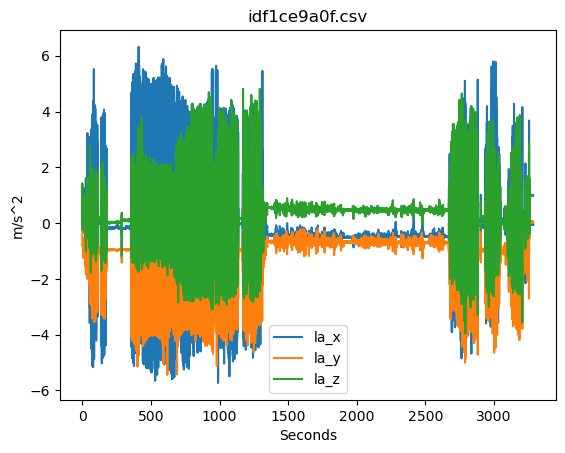

In [5]:
'''
(3) Plot one device of recording
Get an overview plot. Make sure the unit make sense. 
'''
device_location = 'la'
loc_x = device_location+'_x'
loc_y = device_location+'_y'
loc_z = device_location+'_z'

plt.plot(df.time_s, df[loc_x], label=loc_x)
plt.plot(df.time_s, df[loc_y], label=loc_y)
plt.plot(df.time_s, df[loc_z], label=loc_z)
plt.xlabel('Seconds')
plt.ylabel('m/s^2')
plt.legend()
title = file_id.split('/')[-1]
plt.title(title)

In [7]:
'''
(4) Simple data quality check 
Accelerometer data quality check
'''
# Check sampling rate
print(np.unique(df.time_s.diff()))

# Check any missing data point
print(df.isnull().sum())

# Check the units of Y-axis and X-asis

[0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01
 0.01 0.01 0.01 0.01 0.01 0.01  nan]
activity    0
time_s      0
lw_x        0
lw_y        0
lw_z        0
lh_x        0
lh_y        0
lh_z        0
la_x        0
la_y        0
la_z        0
ra_x        0
ra_y        0
ra_z        0
dtype: int64


[ 1  2  3  4 77 99]
No Activity==5 (clapping) for id= idf1ce9a0f.csv
idf1ce9a0f.csv [ 1  2  3  4 77 99]
idff99de96.csv [ 1  2  3  4 77 99]
id34e056c8.csv [ 1  2  3  4 77 99]
id37a54bbf.csv [ 1  2  3  4 77 99]
id5308a7d6.csv [ 1  2  3  4 77 99]
id687ab496.csv [ 1  2  3  4 77 99]
id82b9735c.csv [ 1  2  3  4 77 99]
idd80ac2b4.csv [ 1  2  3 77 99]
id079c763c.csv [ 1  2  3  4 77 99]
idabd0c53c.csv [ 1  2  3 77 99]
id1165e00c.csv [ 1  2  3  4 77 99]
id1c7e64ad.csv [ 1  2  3  4 77 99]
ida61e8ddf.csv [ 1  2  3 77 99]
idecc9265e.csv [ 1  2  3  4 77 99]
idc91a49d0.csv [ 1  2  3  4 77 99]
id00b70b13.csv [ 1  2  3  4 77 99]
idc735fc09.csv [ 1  2  3  4 77 99]
idf540d82b.csv [ 1  2  3  4 77 99]
id8e66893c.csv [ 1  2  3  4 77 99]
id3e3e50c7.csv [ 1  2  3  4 77 99]
idfc5f05e4.csv [ 1  2  3  4 77 99]
id1f372081.csv [ 1  2  3 77 99]
id5993bf4a.csv [ 1  2  3  4 77 99]
id86237981.csv [ 1  2  3  4 77 99]
id650857ca.csv [ 1  2  3  4 77 99]
idb221f542.csv [ 1  2  3  4 77 99]
id9603e9c3.csv [ 1  2  3 77 99]
i

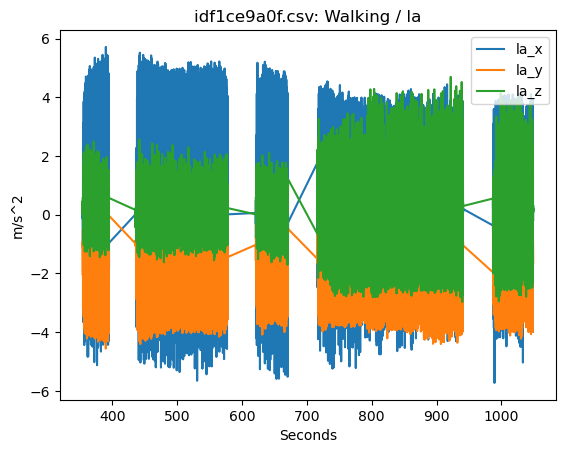

In [8]:
'''
(5) Check activity type and plot Walking activity 
    * Note: make sure to confirm if the flat lines are missing data or true recording
'''
print(np.unique(df.activity))    # Print all activity id
print("No Activity==5 (clapping) for id=",title)

df2 = df[df.activity==1]

# Plot Walking activity 
plt.plot(df2.time_s, df2[loc_x], label=loc_x)
plt.plot(df2.time_s, df2[loc_y], label=loc_y)
plt.plot(df2.time_s, df2[loc_z], label=loc_z)
plt.xlabel('Seconds')
plt.ylabel('m/s^2')
plt.legend()
title = file_id.split('/')[-1]
plt.title(title+": Walking / "+device_location)


# Check Activities recorded for all subjects
for file in all_files:
    df = pd.read_csv(file)
    print(file.split('/')[-1], np.unique(df.activity))

print('5 subejcts did not include Driving (activity=4) event')

Text(0.5, 1.0, 'idf1ce9a0f.csv: Walking / la')

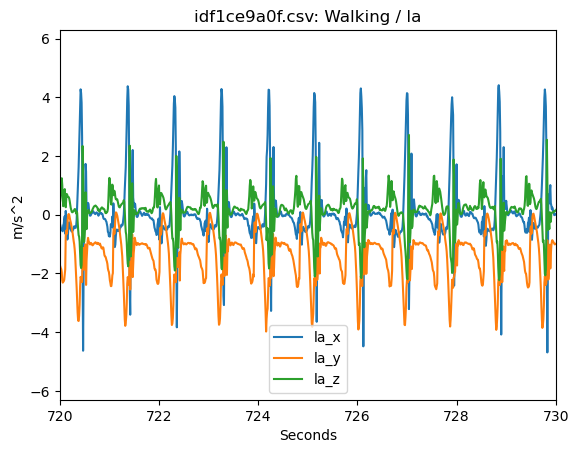

In [10]:
'''
(6) Zoom-in plot of Walking activity 
'''
# Plot zoom-in of Walking
plt.plot(df2.time_s, df2[loc_x], label=loc_x)
plt.plot(df2.time_s, df2[loc_y], label=loc_y)
plt.plot(df2.time_s, df2[loc_z], label=loc_z)
plt.xlim(720,730)
plt.xlabel('Seconds')
plt.ylabel('m/s^2')
plt.legend()
title = file_id.split('/')[-1]
plt.title(title+": Walking / "+device_location)

In [1]:
'''
(7) Use functions for data visualization
    * Note: need to use 'mask' to deal with the missing data points for showing correct plots
Acc data comparision for Walking among different device locations
Write the scripts in function so that we may check diffrent outputs quickly  
'''
def load_data(file_id):
    data_path = "../data/raw_accelerometry_data/" # Directory of raw accelerometer data 
    all_files = glob.glob(data_path+'*.csv')      # Get names for all CSV files

    file_id = all_files[file_id]     # Load one CSV file
    df = pd.read_csv(file_id) 
    return file_id, df

def plot_zoomin(file_id, df, activity, device_location, t0=None, t1=None):
    '''
    Function to plot a zoom-in acc records
    '''

    def appl_mask(x, y):
        '''
        This sub-function will deal with missing data points for showing correct plot of time series data         
        '''
        threshold = 0.01*5                    # Default sampling rate rate is 100-HZ (0.01 sec); Here set to allow 5 of missing data points  
        mask = x.diff()>threshold             # Find missing periods if the gap is greater than the default sampling rate
        masked_x = ma.masked_where(mask, x)   # Fill gap with '-'
        masked_y = ma.masked_where(mask, y)   # Fill gap with '-'
        return masked_x, masked_y

    df2 = df[df.activity==activity]  # Select data for a certain Activity
    
    # Define device location
    loc_x = device_location+'_x'
    loc_y = device_location+'_y'
    loc_z = device_location+'_z'
    
    # Check activity type
    if activity==1:
        activity_type = "Walking"
    elif activity==2:
        activity_type = "Descending Stairs"
    elif activity==3:
        activity_type = "Ascending Stairs"
    elif activity==4:
        activity_type = "Driving"
    elif activity==77:
        activity_type = "Clapping"
    elif activity==99:
        activity_type = "Non-study Activity"
        
    # Check device location
    if device_location=='lw':
        loc = "Left Wrist"    
    elif device_location=='rw':
        loc = "Right Wrist" 
    elif device_location=='lh':
        loc = "Left Hip"
    elif device_location=='rh':
        loc = "Right Hip"        
    elif device_location=='la':
        loc = "Left Ankle"
    elif device_location=='ra':
        loc = "Right Ankle"
        
    # Plot zoom-in Acc data
    x = df2.time_s
    y = df2[loc_x]
    masked_x, masked_y = appl_mask(x, y)
    plt.plot(masked_x, masked_y, label=loc_x)

    x = df2.time_s
    y = df2[loc_y]
    masked_x, masked_y = appl_mask(x, y)    
    plt.plot(masked_x, masked_y, label=loc_y)

    x = df2.time_s
    y = df2[loc_z]
    masked_x, masked_y = appl_mask(x, y)  
    plt.plot(masked_x, masked_y, label=loc_z)
    
    plt.xlabel('Seconds')
    plt.ylabel('m/s^2')
    plt.legend()
    if t0 and t1:
        plt.xlim(t0, t1)
    file_id = file_id.split('/')[-1]
    plt.title('File='+file_id+' / Activity='+activity_type+' / Device Location='+loc)


# Begin to plot Walking activity observed from three locations:    
file_id = 0          # load the first CSV file
file_id, df = load_data(file_id)

activity = 1         # plot Activity=1 (Walking)
t0 = 720             # Define t_begin of the zoom-in
t1 = 730             # Define t_end of the zoom-in

plt.figure(figsize=(10,8))

plt.subplot(311)
device_location = 'lw'
plot_zoomin(file_id, df, activity, device_location, t0, t1)
    
plt.subplot(312)
device_location = 'lh'
plot_zoomin(file_id, df, activity, device_location, t0, t1)

plt.subplot(313)
device_location = 'la'
plot_zoomin(file_id, df, activity, device_location, t0, t1)

plt.tight_layout()

NameError: name 'glob' is not defined

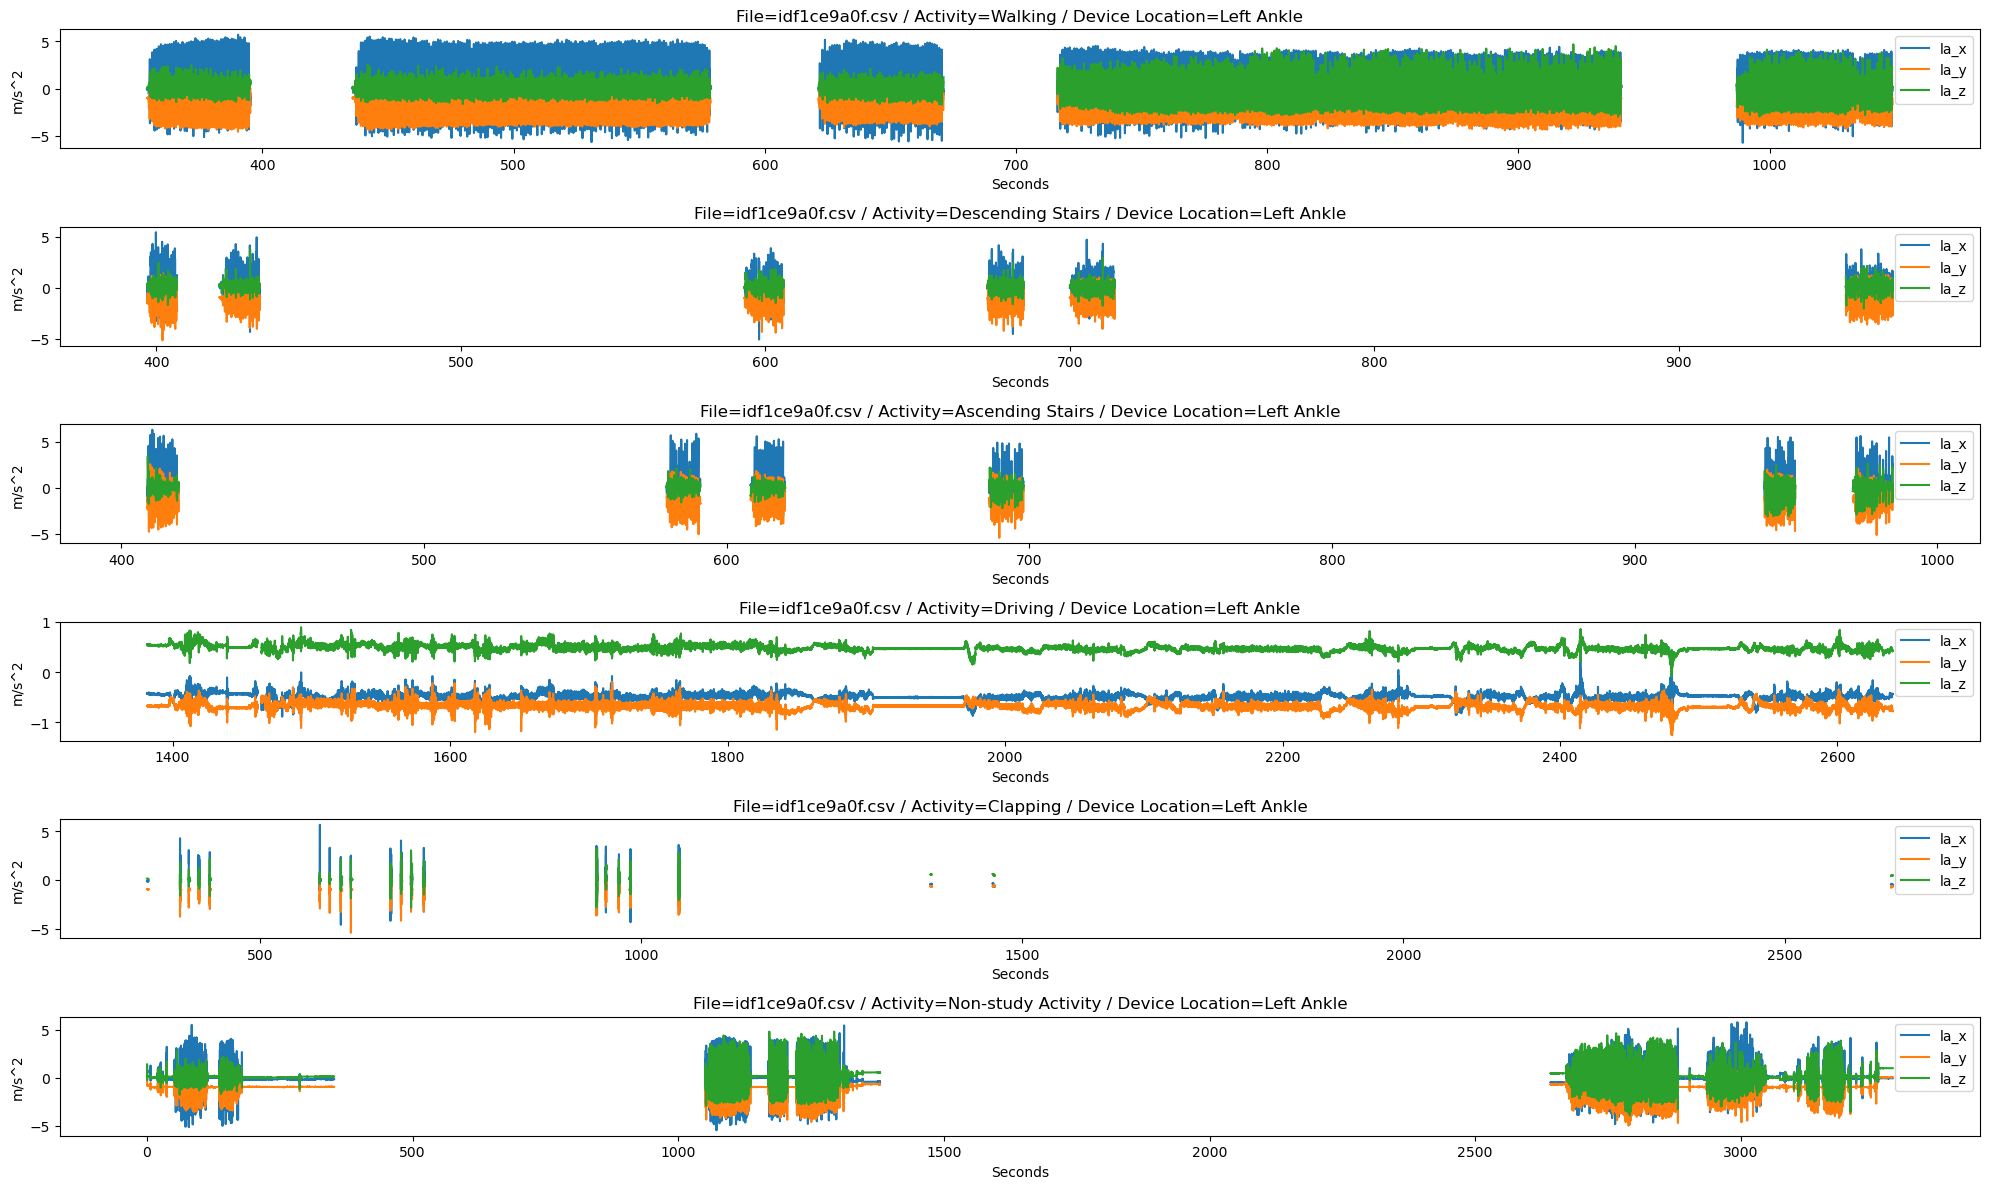

In [12]:
# Begin to plot Walking activity observed from three locations:    
file_id = 0          # load the first CSV file
file_id, df = load_data(file_id)

plt.figure(figsize=(20,12))

plt.subplot(611)
device_location = 'la'
activity = 1         # plot Activity=1 (Walking)
# plot_zoomin(file_id, df, activity, device_location, 720, 730)
plot_zoomin(file_id, df, activity, device_location)
    
plt.subplot(612)
device_location = 'la'
activity = 2         # plot Activity=2 (Descending Stairs)
# plot_zoomin(file_id, df, activity, device_location, 700, 710)
plot_zoomin(file_id, df, activity, device_location)

plt.subplot(613)
device_location = 'la'
activity = 3         # plot Activity=3 (Ascending Stairs)
# plot_zoomin(file_id, df, activity, device_location, 610, 620)
plot_zoomin(file_id, df, activity, device_location)

plt.subplot(614)
device_location = 'la'
activity = 4         # plot Activity=4 (Driving)
plot_zoomin(file_id, df, activity, device_location)

plt.subplot(615)
device_location = 'la'
activity = 77         # plot Activity=77 (Clapping)
plot_zoomin(file_id, df, activity, device_location)

plt.subplot(616)
device_location = 'la'
activity = 99         # plot Activity=99 (non-study activity)
plot_zoomin(file_id, df, activity, device_location)

plt.tight_layout()